# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.



The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.



Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [201]:
# importing the neccessary libraries

import numpy as np
import pandas as pd

# visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warning

import warnings
warnings.filterwarnings(action='ignore')


In [202]:
# Display formatting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Reading  and Understandings Dataset

In [203]:
# Reading the dataset
from google.colab import drive
drive.mount('/content/drive')
lead_data = pd.read_csv('/content/drive/MyDrive/Leads.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
# Checking the head of the dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [205]:
# Checking the tail of the dataset
lead_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


### Inspection of Dataset

In [206]:
# Checking the shape of the dataset
lead_data.shape

(9240, 37)

We have 9240 Rows and 37 columns in our dataset

In [207]:
# Checking the size of the data set
lead_data.size

341880

In [208]:
# Listing all the columns in the dataset
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [209]:
# checking the data types in the dataset
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [210]:
# checking the basic info of the dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [211]:
# Checking the basic statistical details of the dataset
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [212]:
# Checking the null values in the data set
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

We have null values present in the dataset

#### Handling the 'Select' level that is present in many of the categorical variables.
We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [213]:
# Replacing the 'Select' value to NaN
lead_data =lead_data.replace('Select', np.nan)

In [214]:
# Checking the head of the dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [215]:
# Finding the null percentages across columns
round(100*lead_data.isnull().mean(),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [216]:
# sorting the percentage missing values
Total_null_values = round(100*lead_data.isnull().mean(),2).sort_values(ascending=False)
Total_null_values

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [217]:
# number of columns having null values more than 40%
cols_to_drop = Total_null_values[Total_null_values>40]

In [218]:
cols_to_drop

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
dtype: float64

In [219]:
len(cols_to_drop)

7

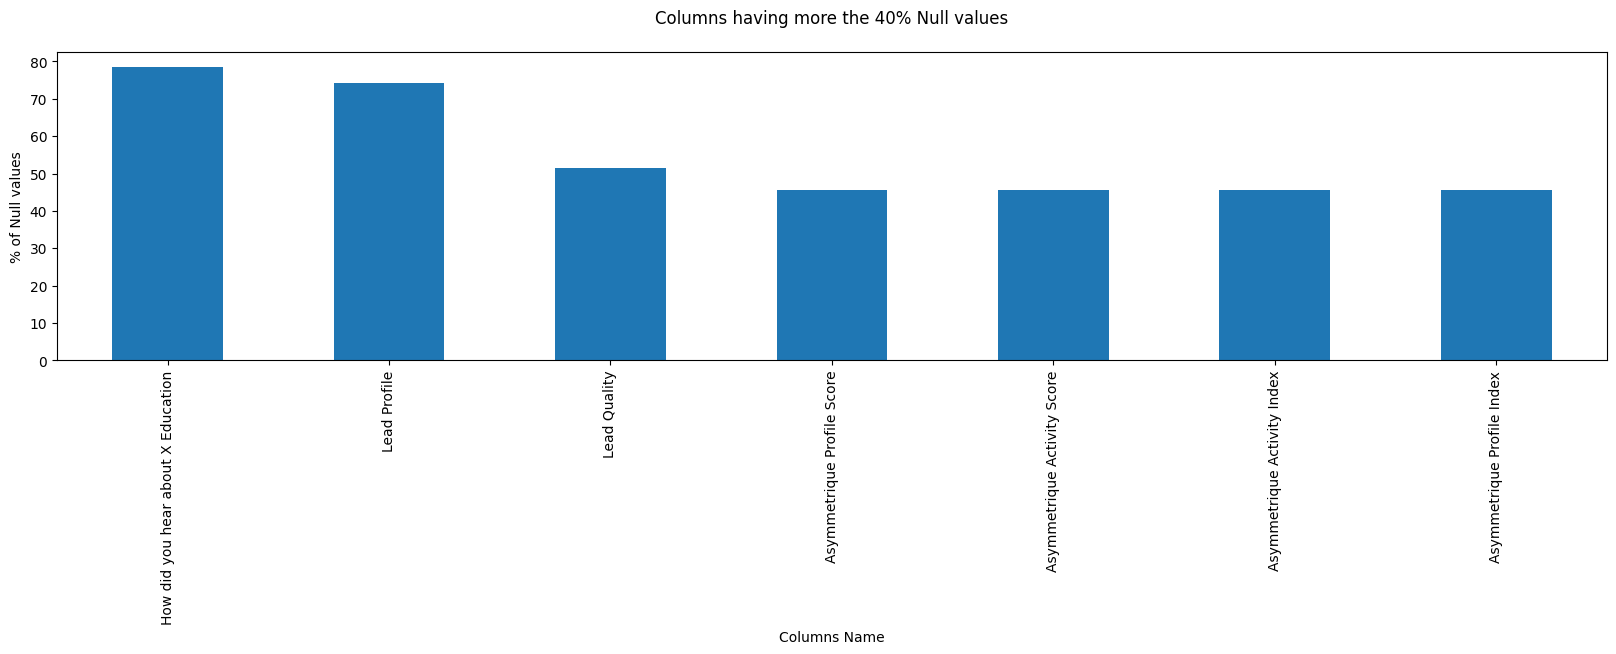

In [220]:
# Plotting the columns having null values more than 40%
plt.figure(figsize=[20,4])
cols_to_drop.plot(kind='bar')
plt.title('Columns having more the 40% Null values\n')
plt.xlabel('Columns Name')
plt.ylabel('% of Null values')
plt.show()

In [221]:
# Dropping the columns having more the 40% of null values
lead_data.drop(cols_to_drop.index,axis=1,inplace=True)

In [222]:
lead_data.shape

(9240, 30)

In [223]:
# checking for percentange of null values
round(100*lead_data.isnull().mean(),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

### imputing the missing values in the data set

#### 1) Column : City

In [224]:
# Column 'City' has 40% missing values
# Finding the percentage of the different categories of this column:
round(100*lead_data['City'].value_counts(normalize= True),2)

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64

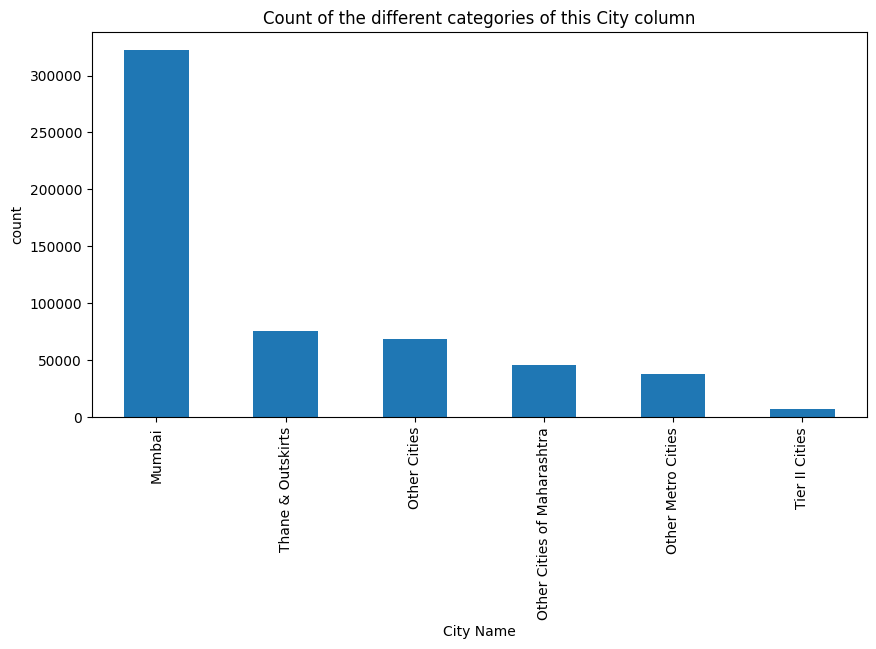

In [225]:
plt.figure(figsize=[10,5])
round(100*lead_data['City'].value_counts(),2).plot(kind='bar')
plt.title('Count of the different categories of this City column')
plt.xlabel('City Name')
plt.ylabel('count')
plt.show()

In [226]:
# Since most values are 'Mumbai', we can impute missing values in this column with this value.

In [227]:
lead_data.City.fillna(lead_data.City.mode()[0], inplace=True)

In [228]:
# Checking for null values in City column
lead_data.City.isnull().sum()

0

In [229]:
# Checking for null values in column
round(100*lead_data.isnull().mean().sort_values(ascending=False),2)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
City                                              0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

#### 2) Column : Specialization

In [230]:
# This column has 37% missing values

In [231]:
# Finding the percentage of the different categories of this column
round(100*lead_data.Specialization.value_counts(normalize=True),2)

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

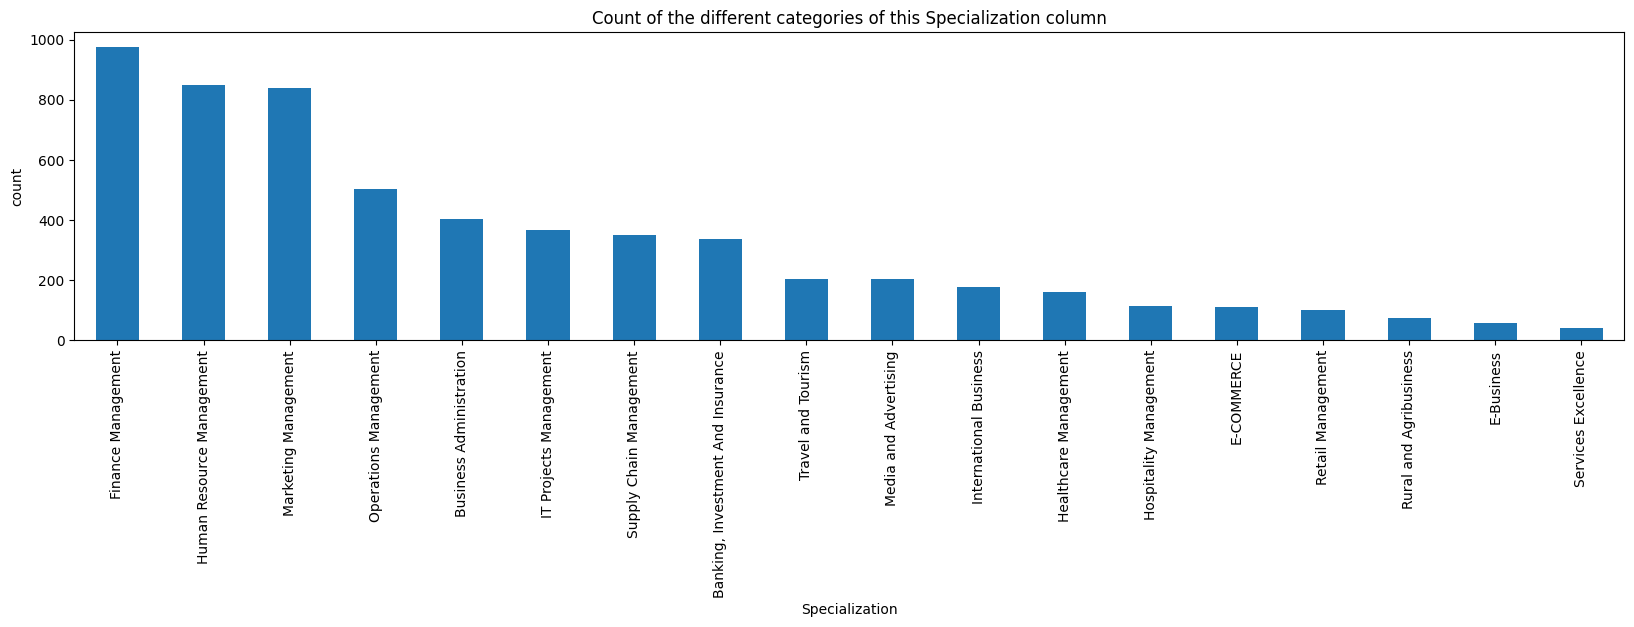

In [232]:
plt.figure(figsize=[20,4])
lead_data.Specialization.value_counts().plot(kind='bar')
plt.title('Count of the different categories of this Specialization column')
plt.xlabel('Specialization')
plt.ylabel('count')
plt.show()

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [233]:
# Creating a separate category called 'Others' for this
lead_data.Specialization.fillna('Other', inplace=True)

In [234]:
lead_data.Specialization.isnull().sum()

0

#### 3) Tags column
'Tags' column has 36% missing values

In [235]:
# Checking for Different Categories in this column
lead_data.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [236]:
# Finding the percentage of the different categories of this column:
round(100*lead_data.Tags.value_counts(normalize=True),2)

Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                                    0.

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [237]:
# Imputing the null values in Tags column with 'Will revert after reading the email'
lead_data.Tags.fillna(lead_data.Tags.mode()[0], inplace=True)

In [238]:
lead_data.Tags.isnull().sum()

0

#### 4) Column: 'What matters most to you in choosing a course'
this column has 29% missing values

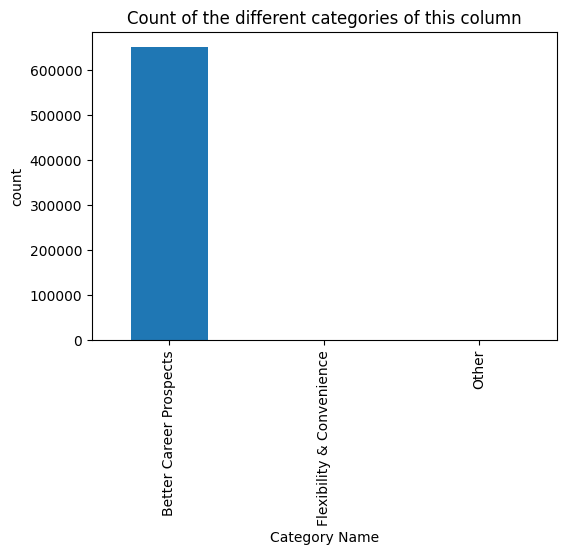

In [239]:
# Visualizing this column
plt.figure(figsize=[6,4])
round(100*lead_data['What matters most to you in choosing a course'].value_counts(),2).plot(kind='bar')
plt.title('Count of the different categories of this column')
plt.xlabel('Category Name')
plt.ylabel('count')
plt.show()

In [240]:
# Finding the percentage of the different categories of this column
round(100*lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [241]:
# Dropping 'What matters most to you in choosing a course'
lead_data.drop('What matters most to you in choosing a course', axis=1, inplace=True)

#### 4) Column: 'What is your current occupation'
this column has 29% missing values

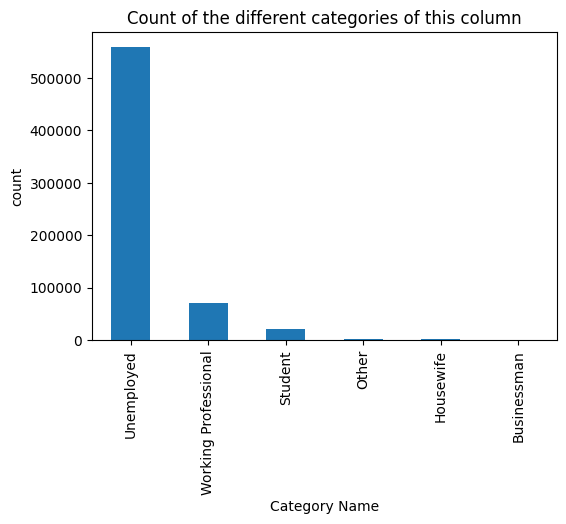

In [242]:
# Visualizing this column
plt.figure(figsize=[6,4])
round(100*lead_data['What is your current occupation'].value_counts(),2).plot(kind='bar')
plt.title('Count of the different categories of this column')
plt.xlabel('Category Name')
plt.ylabel('count')
plt.show()

In [243]:
# Finding the percentage of the different categories of this column
round(100*lead_data['What is your current occupation'].value_counts(normalize=True),2)

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [244]:
# Imputing the null value with the most value 'Unemployed'
lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0], inplace=True)

In [245]:
lead_data['What is your current occupation'].isnull().sum()

0

#### 6) Column: 'Country'
This column has 27% missing values

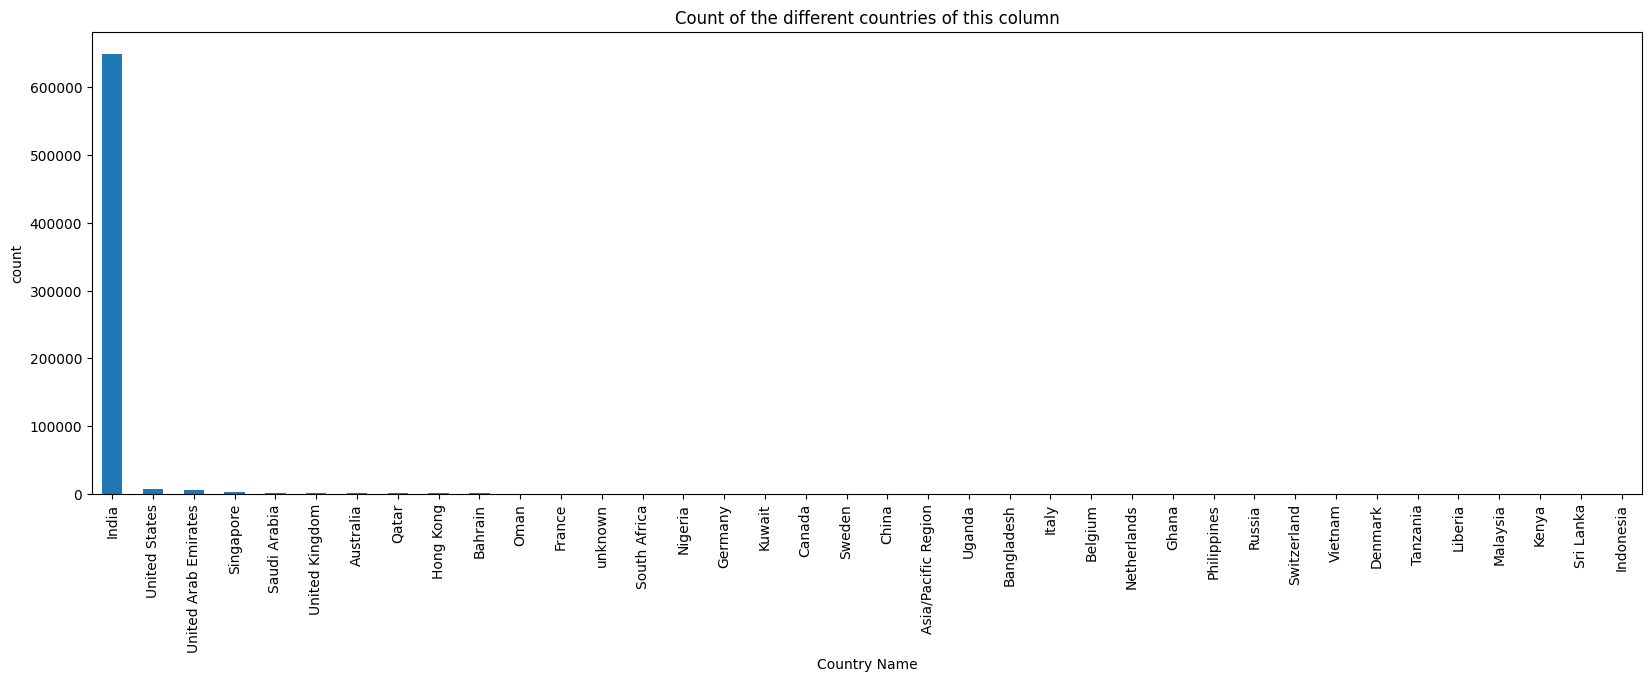

In [246]:
# Visualizing this column
plt.figure(figsize=[20,6])
round(100*lead_data.Country.value_counts(),2).plot(kind='bar')
plt.title('Count of the different countries of this column')
plt.xlabel('Country Name')
plt.ylabel('count')
plt.show()

In [247]:
# Finding the percentage of the different categories of this column:
round(lead_data.Country.value_counts(normalize=True),2)*100

India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [248]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data.Country.fillna(lead_data.Country.mode()[0], inplace=True)

In [249]:
lead_data.Country.isnull().sum()

0

In [250]:
# Finding the null percentages across columns after imputing & removing the above columns
round(100*lead_data.isnull().mean(),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

#### After imputing missing values are under 2% so we can drop these rows.

In [251]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [252]:
# Finding the null percentages across columns after dropping the above rows
round(100*lead_data.isnull().mean(),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

#### We can find the percentage of rows retained.

In [253]:
# Percentage of rows retained
(len(lead_data.index)/9240)*100

98.2034632034632

#### We have retained 98% of the rows after cleaning the data .

## Exploratory Data Anaysis

#### Checking for duplicates

In [254]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


## Univariate Analysis

#### 1) Converted
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [255]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

#### 2) Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

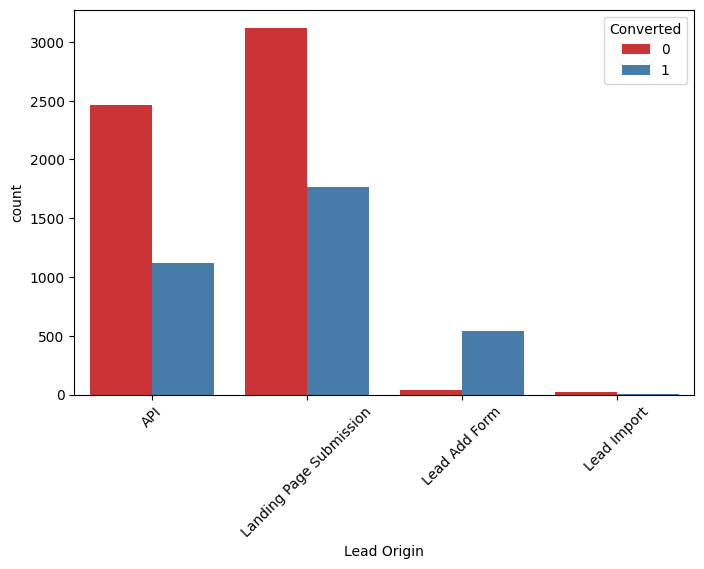

In [256]:
plt.figure(figsize=(8,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 45)

#### Inference :
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.

#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

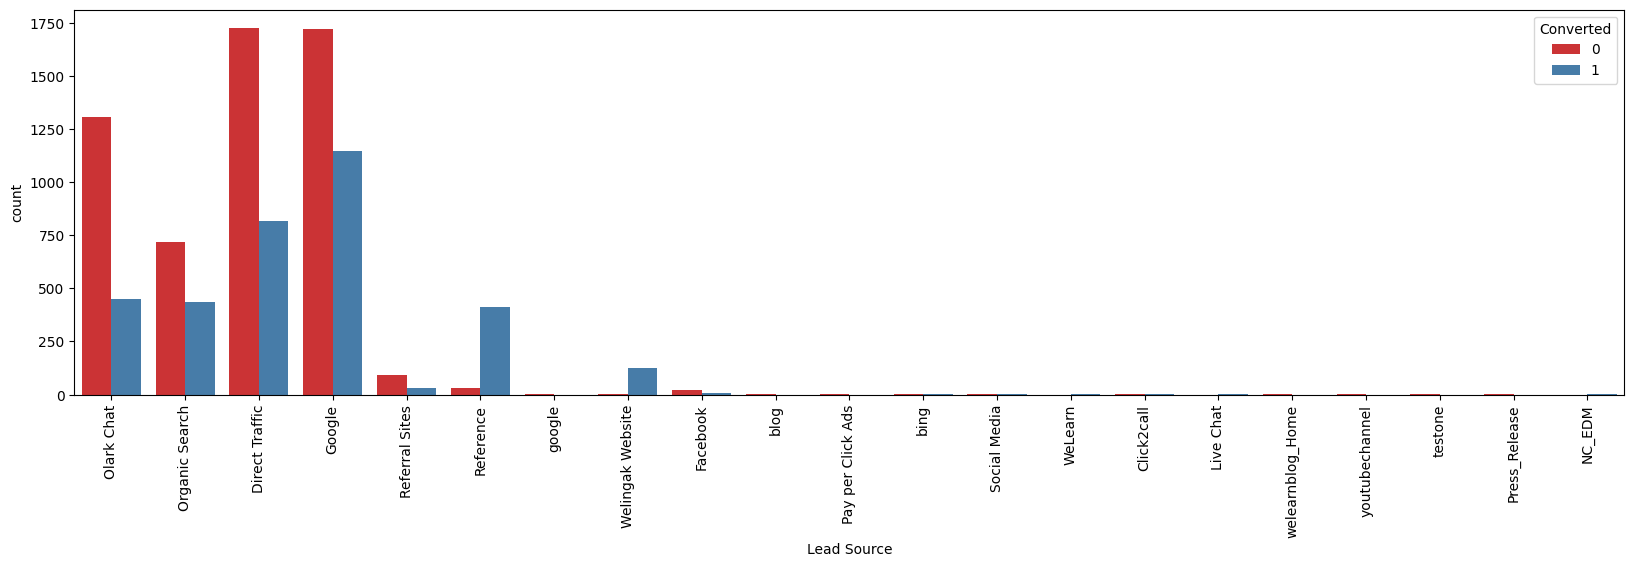

In [257]:
plt.figure(figsize=(20,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set1')
plt.xticks(rotation = 90)

In [258]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [259]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

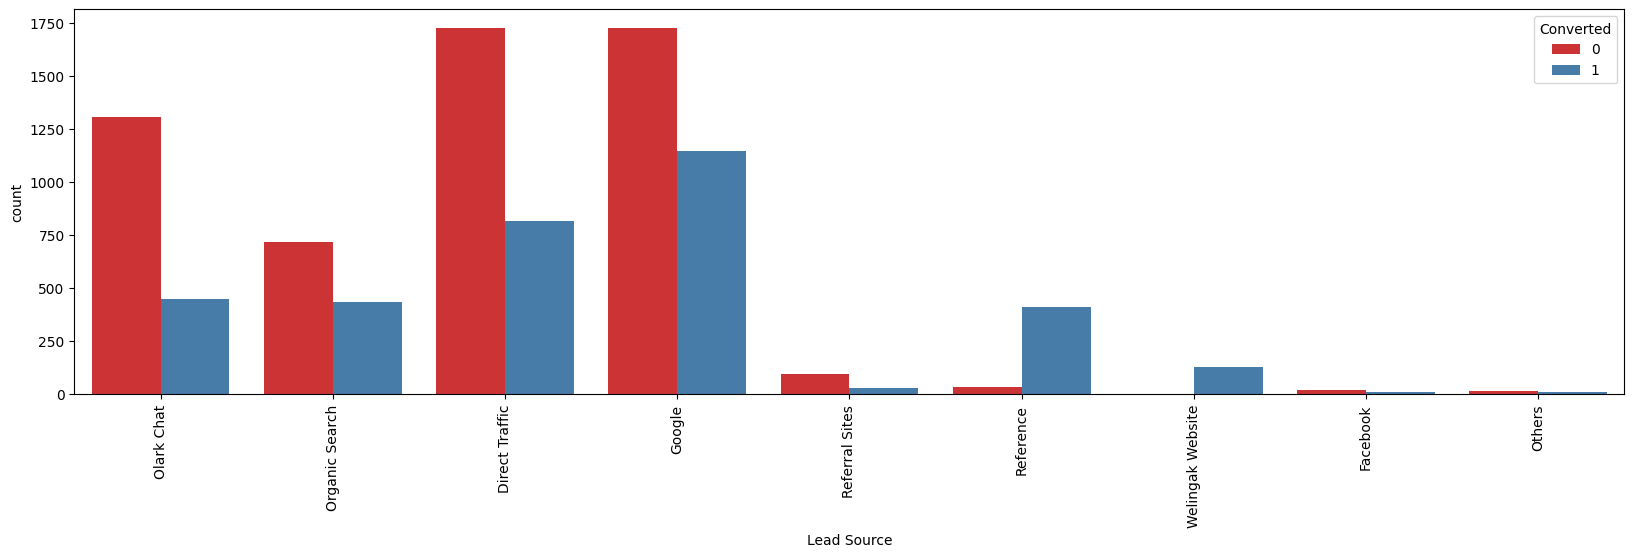

In [260]:
# Visualizing again
plt.figure(figsize=(20,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

#### 4) Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

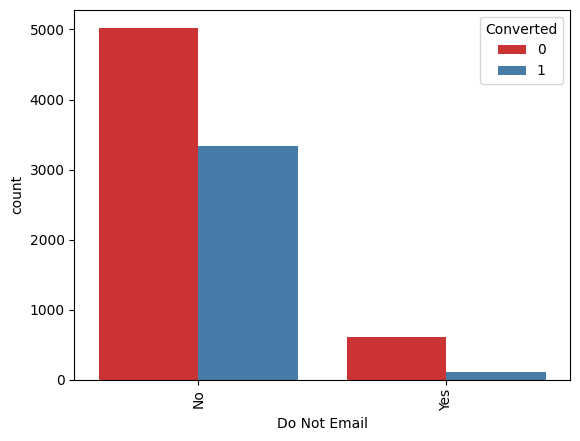

In [261]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#### 5) Do not call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

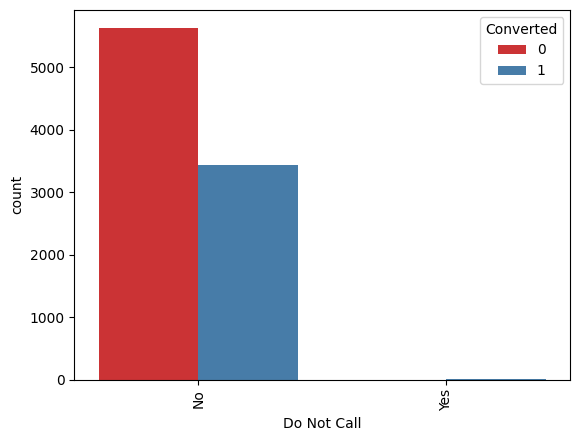

In [262]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

#### 6) TotalVisits

In [263]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [264]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

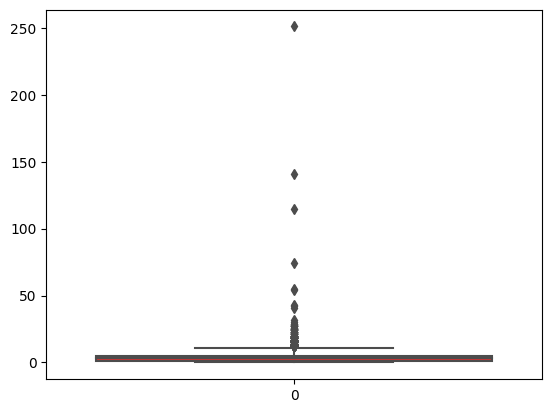

In [265]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

#### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [266]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

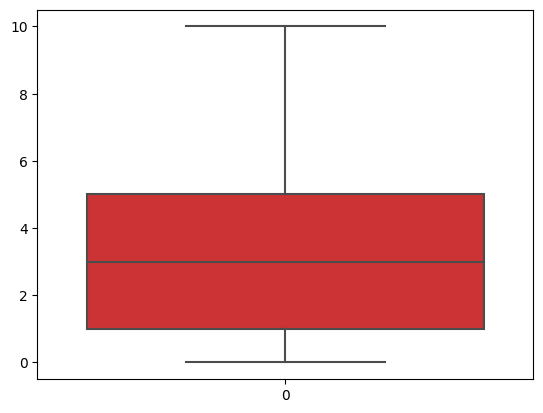

In [267]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

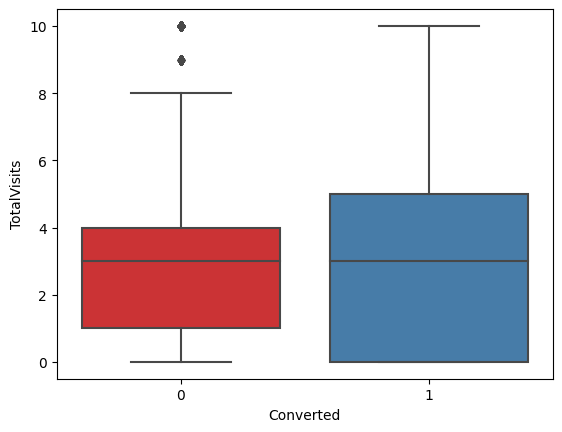

In [268]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set1')

#### Inference
1. Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

#### 7) Total Time Spent on Website

In [269]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

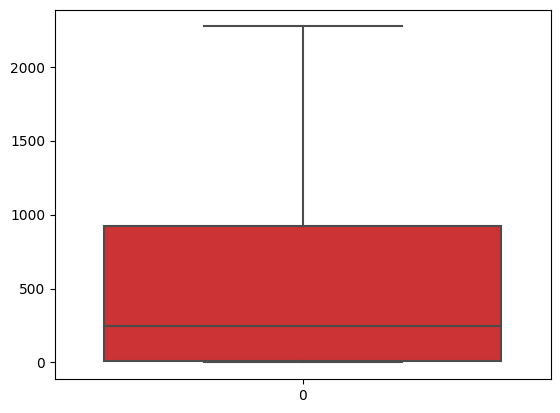

In [270]:

sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

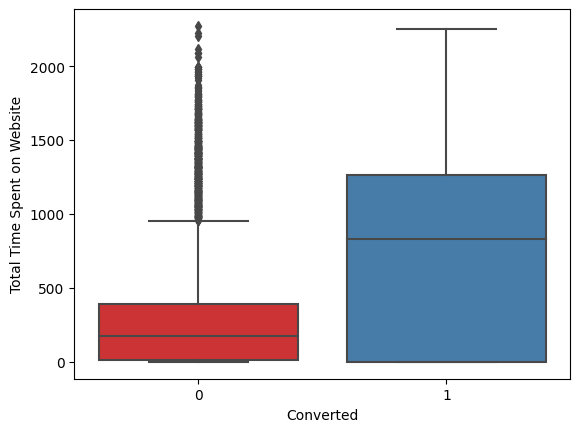

In [271]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set1')

#### Inference
1. Leads spending more time on the weblise are more likely to be converted.

#### Website should be made more engaging to make leads spend more time.

#### 8) Page Views Per Visit

In [272]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

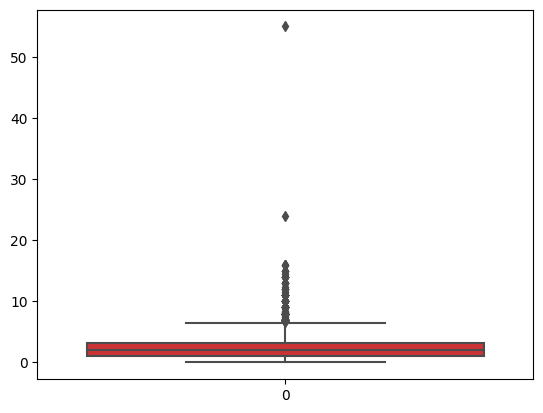

In [273]:


sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [274]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

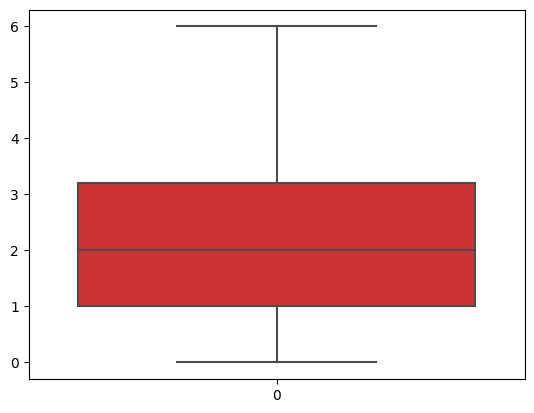

In [275]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set1',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

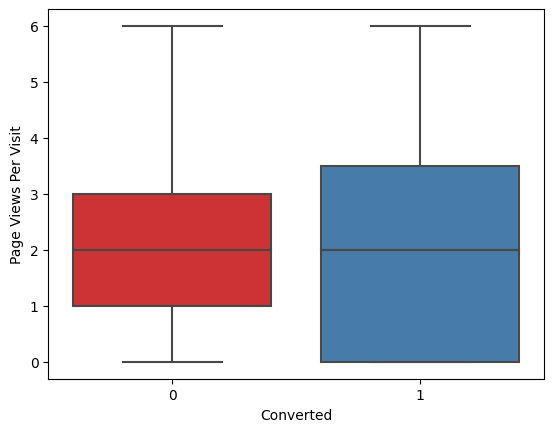

In [276]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set1')

Median for converted and unconverted leads is the same.

#### 9) Last Activity

In [277]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

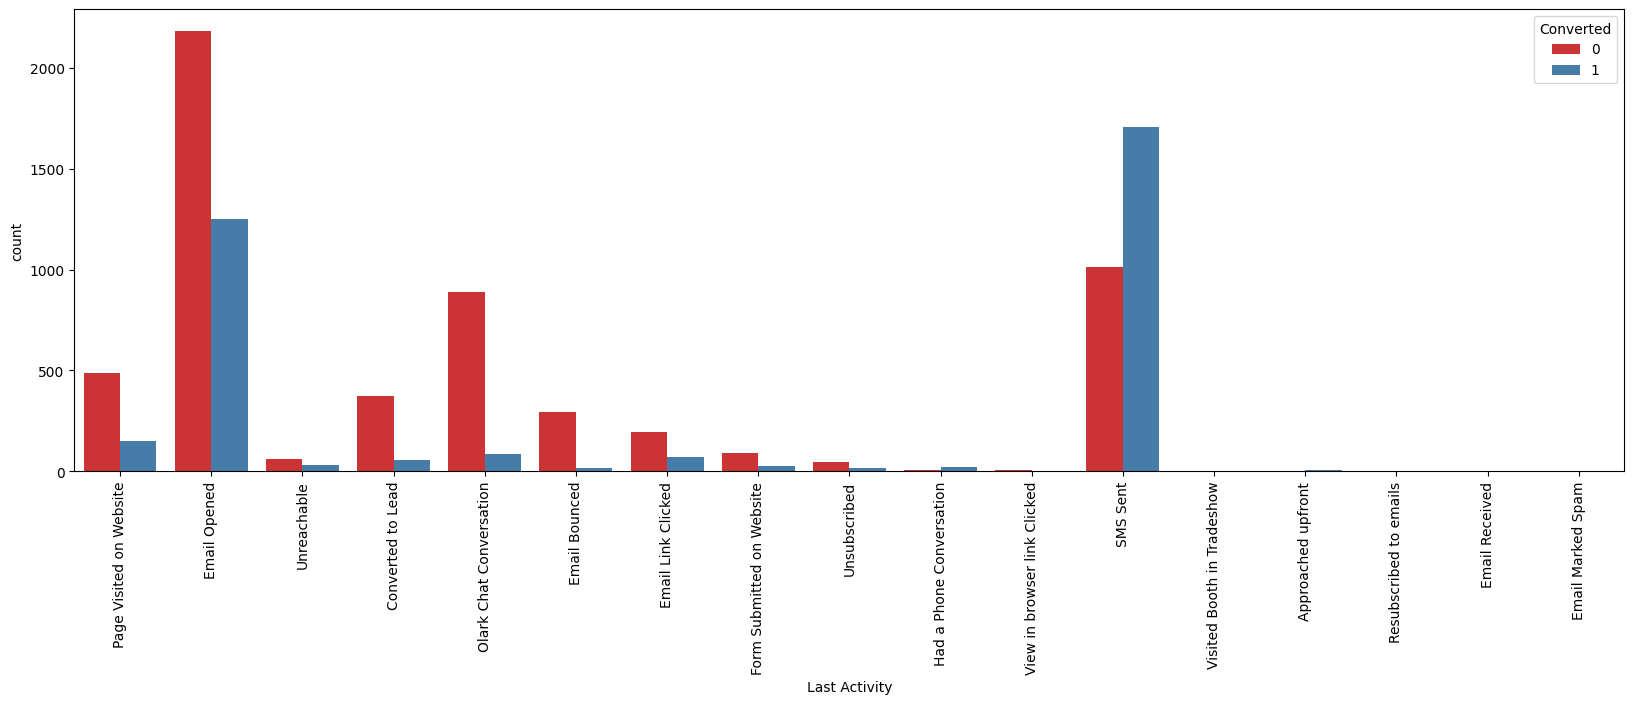

In [278]:
plt.figure(figsize=(20,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

In [279]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

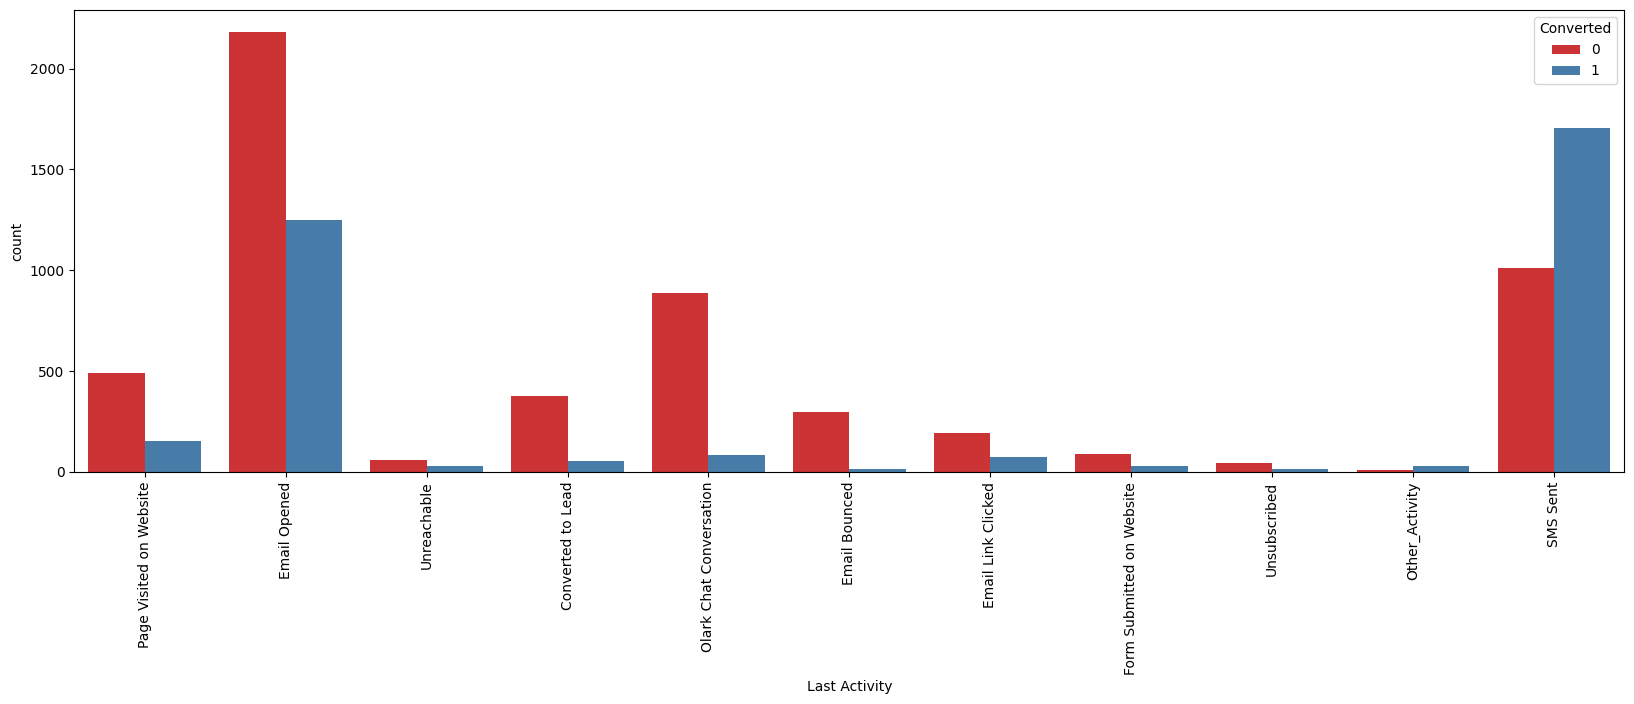

In [280]:
# Visualizing again
plt.figure(figsize=(20,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.

#### 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

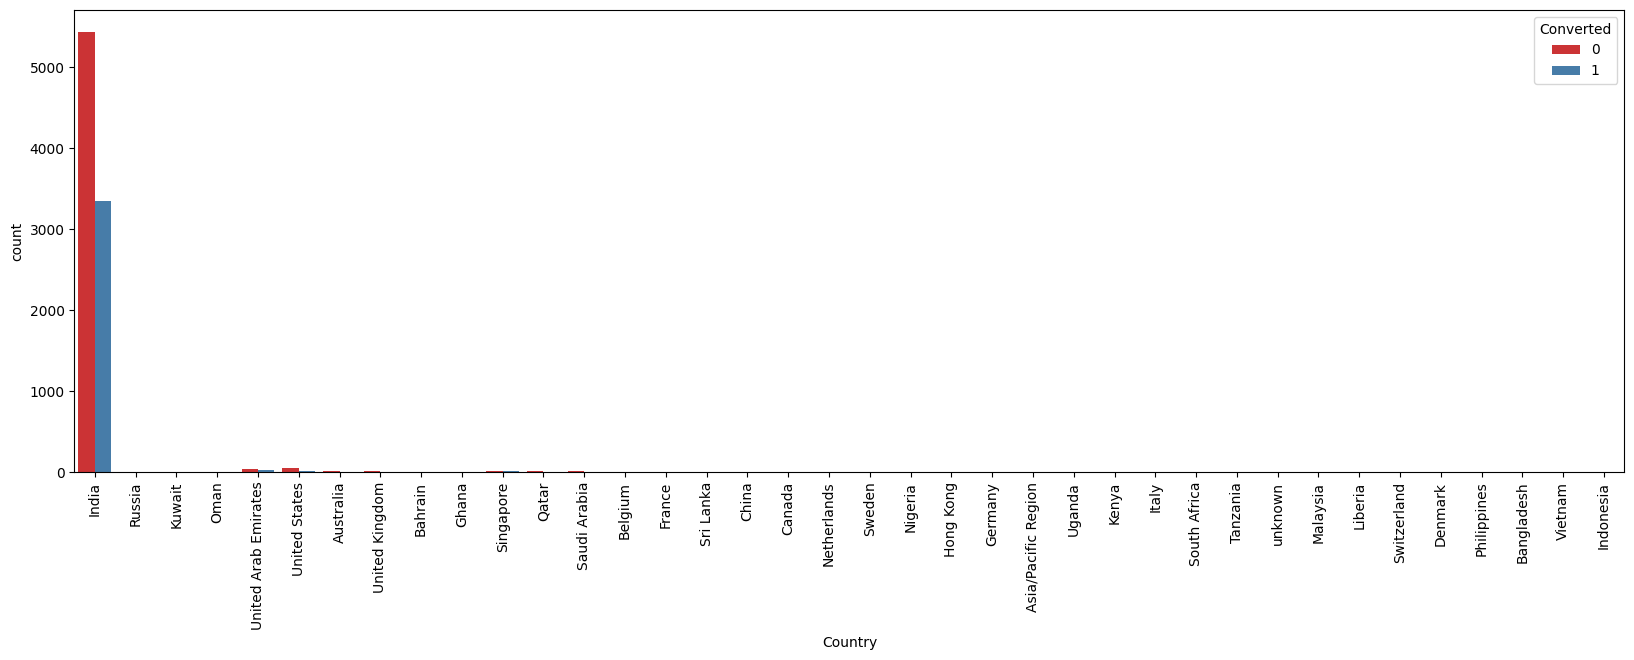

In [281]:
plt.figure(figsize=(20,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Most values are 'India' no such inference can be drawn

##### 11) Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

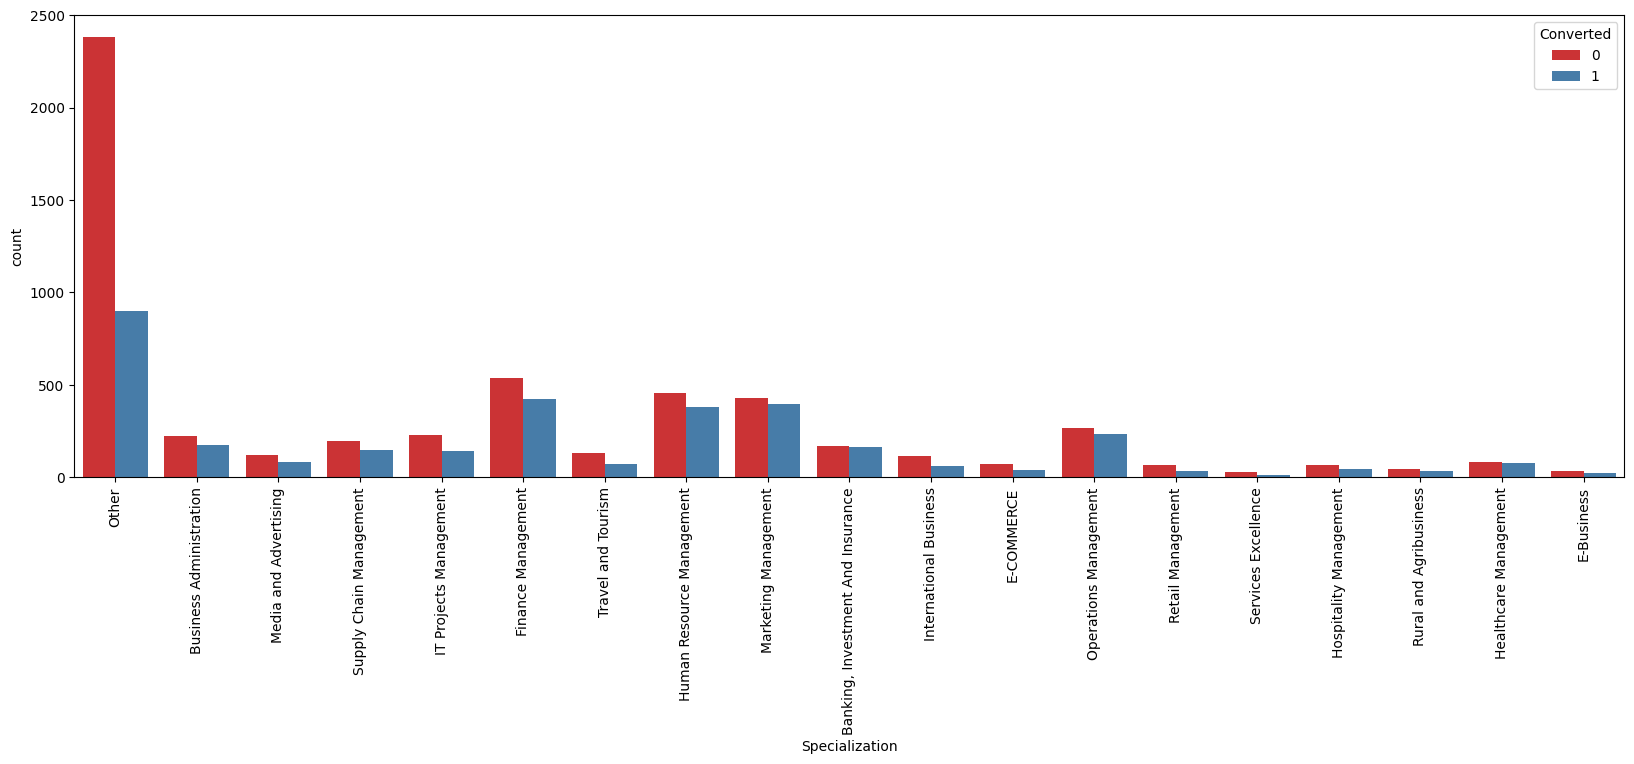

In [282]:
plt.figure(figsize=(20,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

#### 12) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

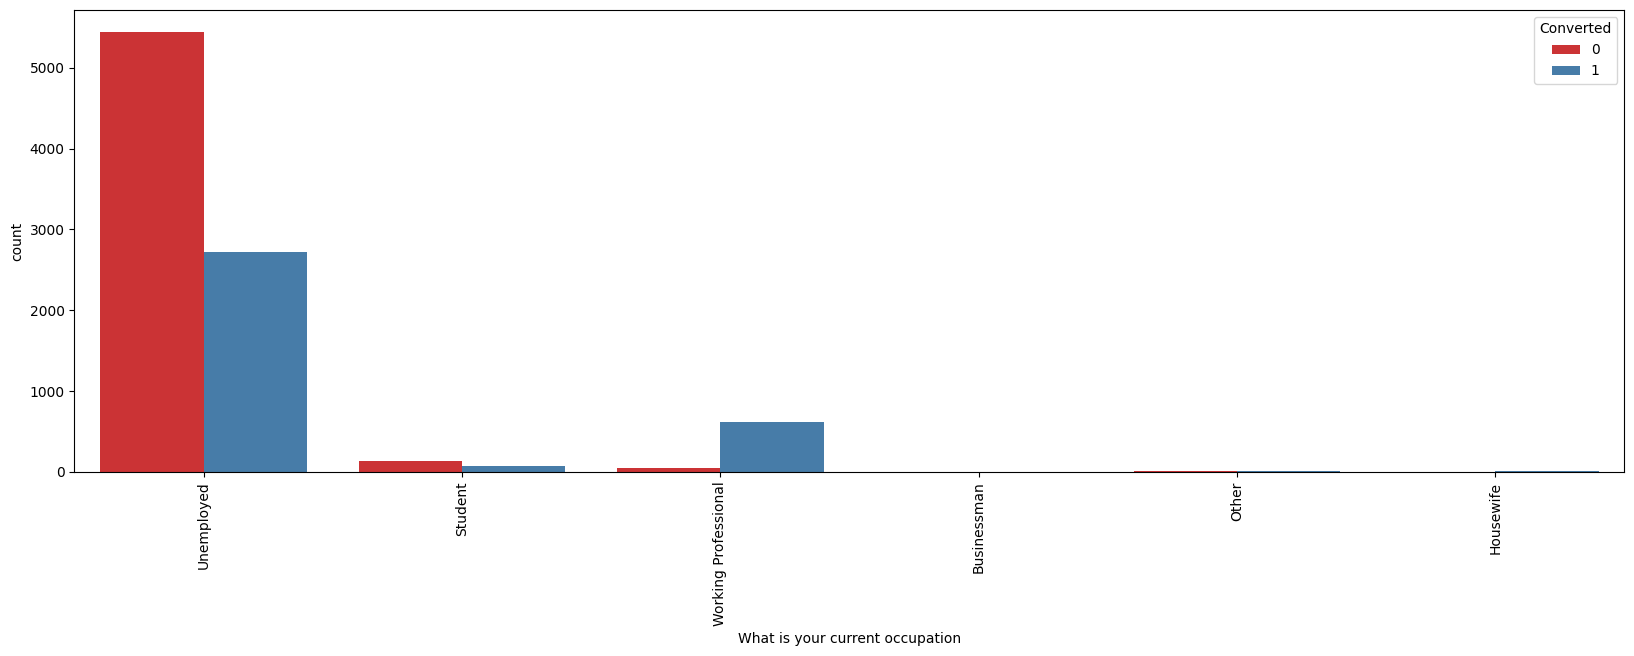

In [283]:
plt.figure(figsize=(20,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### 13) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

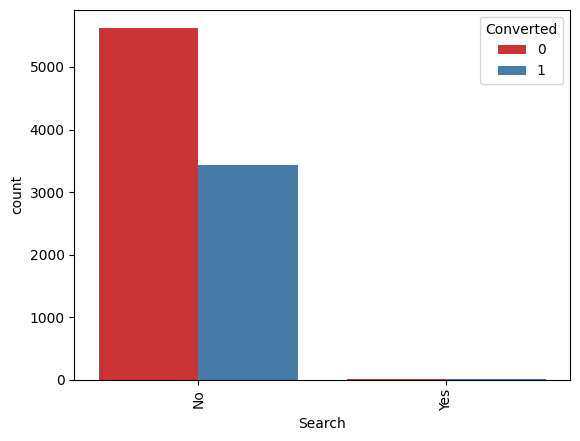

In [284]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Most entries are 'No'. No Inference can be drawn with this parameter.

#### 14) Magazine

(array([0]), [Text(0, 0, 'No')])

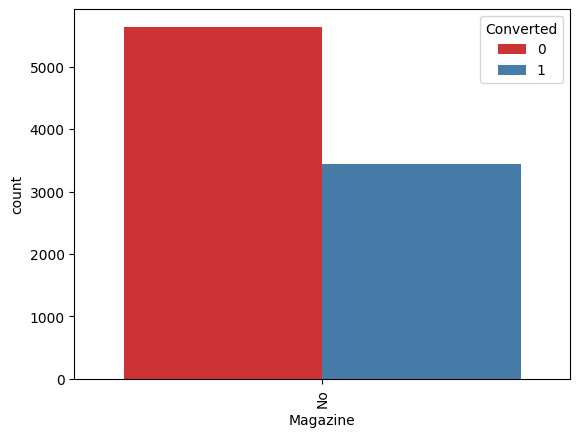

In [285]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set1')
plt.xticks(rotation = 90)

Most entries are 'No'. No Inference can be drawn with this parameter.

### Results
Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [286]:
unwanted_cols= ['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [287]:
lead_data.drop(unwanted_cols,axis=1,inplace=True)

In [288]:
lead_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'Last Notable Activity'],
      dtype='object')

In [289]:
lead_data.shape

(9074, 14)

In [290]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

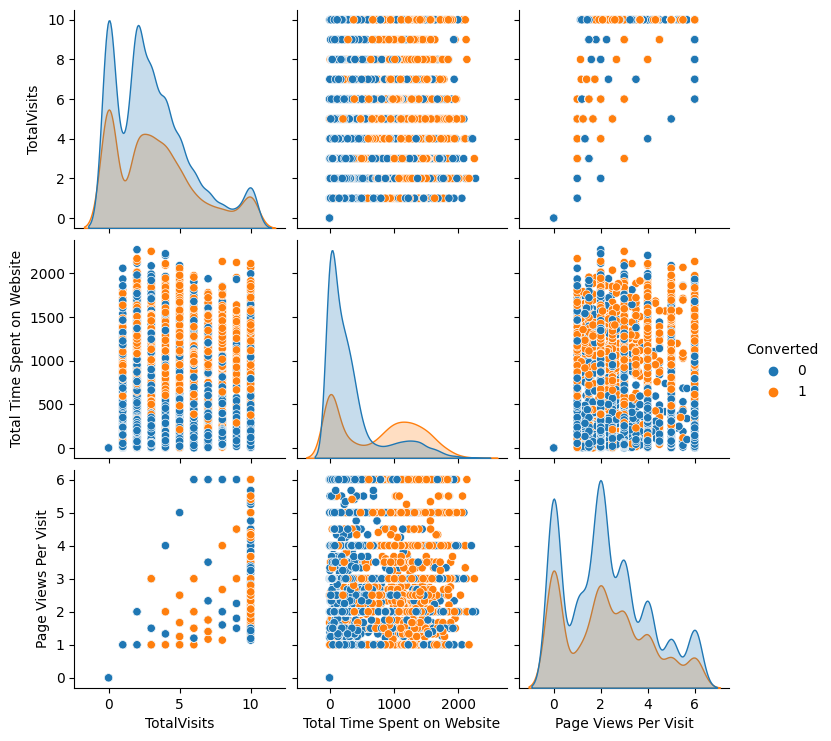

In [291]:
sns.pairplot(lead_data,diag_kind='kde',hue='Converted')
plt.show()

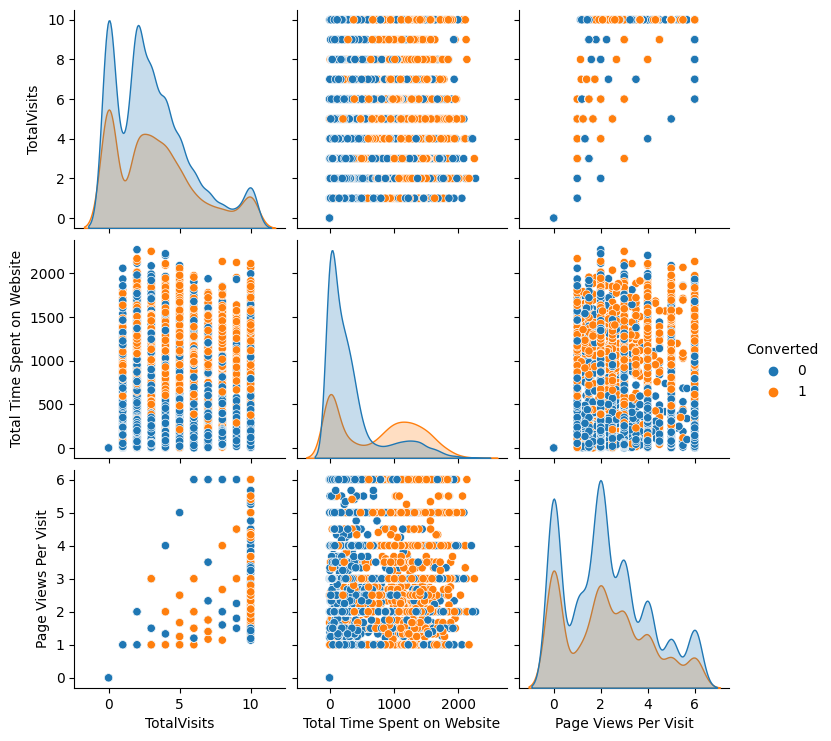

In [292]:
x_axisData = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_axisData,diag_kind='kde',hue='Converted')

In [295]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformed_x_axisData = pd.DataFrame(pt.fit_transform(x_axisData))
transformed_x_axisData.columns = x_axisData.columns
transformed_x_axisData.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.442756,-1.470706,-1.446817,-0.780481
1,0.787521,0.737618,0.287864,-0.780481
2,-0.208896,1.312200,0.020927,1.281261
3,-0.708675,0.273739,-0.602531,-0.780481
4,-0.208896,1.258818,-0.602531,1.281261


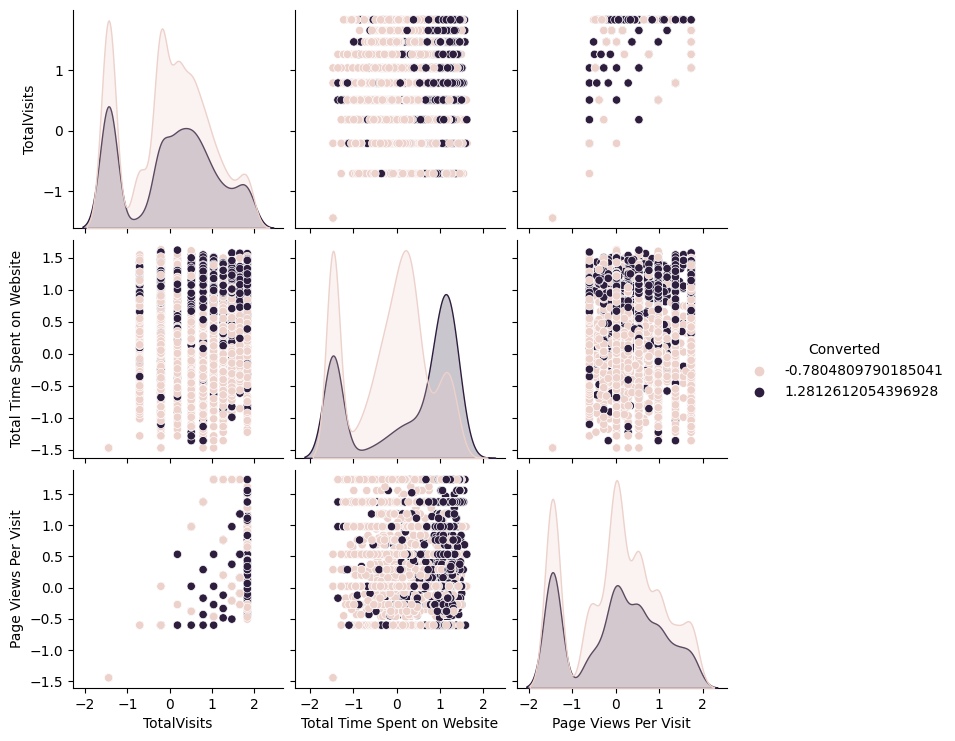

In [296]:
sns.pairplot(transformed_x_axisData,diag_kind='kde',hue='Converted')
plt.show()

## Data Preparation

 #### Converting some binary variables (Yes/No) to 1/0

In [297]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

#### Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [298]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [299]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [300]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], axis = 1)

In [301]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Splitting the data into train and test set.

In [302]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [303]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [304]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the features

In [305]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Feature Selection Using RFE

In [306]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [307]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False])

In [308]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Others', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 35),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 

In [309]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Other', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

# Model Building

### Assessing the model with StatsModels
### Model-1

In [310]:
import statsmodels.api as sm

In [311]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Tue, 21 Nov 2023   Deviance:                       5180.6
Time:                        11:26:59   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4039
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Other_Activity                             1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Other                                    -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [312]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

## Model-2

In [313]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Tue, 21 Nov 2023   Deviance:                       5184.5
Time:                        11:26:59   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Other_Activity                             1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Other                                    -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [314]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

## Model-3

In [315]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Tue, 21 Nov 2023   Deviance:                       5186.1
Time:                        11:26:59   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Other_Activity                             2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Other                                    -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

In [316]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.65
6,Lead Source_Reference,48.09
7,Lead Source_Welingak Website,15.51
14,What is your current occupation_Unemployed,12.37
2,Lead Origin_Landing Page Submission,7.24
12,Specialization_Other,4.63
5,Lead Source_Olark Chat,2.32
16,Last Notable Activity_Modified,1.87
15,What is your current occupation_Working Profes...,1.81
10,Last Activity_SMS Sent,1.64


In [317]:
col1 = col1.drop('What is your current occupation_Student')

### Model-4

In [318]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Tue, 21 Nov 2023   Deviance:                       5189.0
Time:                        11:26:59   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4031
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Other_Activity                             2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Other                                    -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [319]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.59
6,Lead Source_Reference,48.08
7,Lead Source_Welingak Website,15.51
13,What is your current occupation_Unemployed,9.76
2,Lead Origin_Landing Page Submission,5.76
12,Specialization_Other,4.00
5,Lead Source_Olark Chat,2.24
15,Last Notable Activity_Modified,1.86
14,What is your current occupation_Working Profes...,1.66
10,Last Activity_SMS Sent,1.63


In [320]:
# Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.
col1 = col1.drop('Lead Origin_Lead Add Form')

### Model-5

In [321]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Tue, 21 Nov 2023   Deviance:                       5192.3
Time:                        11:26:59   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Other_Activity                             2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Other                                    -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

In [322]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Other,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


In [323]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

### Model-6

In [324]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Tue, 21 Nov 2023   Deviance:                       5200.0
Time:                        11:26:59   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Other_Activity                             2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Other                                    -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

In [325]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

### Model-7

In [326]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 21 Nov 2023   Deviance:                       5203.0
Time:                        11:27:00   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Other                                    -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [327]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Other,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [328]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

### Model-8


In [329]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Tue, 21 Nov 2023   Deviance:                       5210.2
Time:                        11:27:00   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4011
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Other_Activity                             2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Other                                    -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

In [330]:
# Check for the VIF values of the feature variables.
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Other,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [331]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

### Model-9

In [332]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Tue, 21 Nov 2023   Deviance:                       5221.0
Time:                        11:27:00   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Other_Activity                             2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Other                                    -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [333]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Other,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

### Making Prediction on the Train set

In [334]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
1281    0.744001
2880    0.100027
4971    0.965845
7536    0.854512
1248    0.768071
dtype: float64

In [335]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

In [336]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [337]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


### Making the Confusion matrix

In [338]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


In [339]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727

In [340]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


### Metrics beyond simply accuracy

In [341]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [342]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7060506950122649


In [343]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


In [344]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11370038412291933


In [345]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7954859511745739


In [346]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8279904306220096


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
#### We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve
An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [347]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [348]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

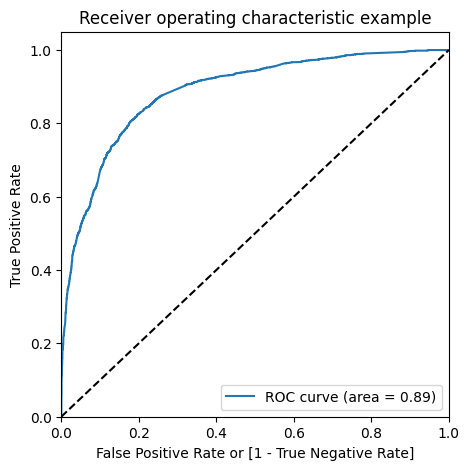

In [349]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point
#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [350]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [351]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


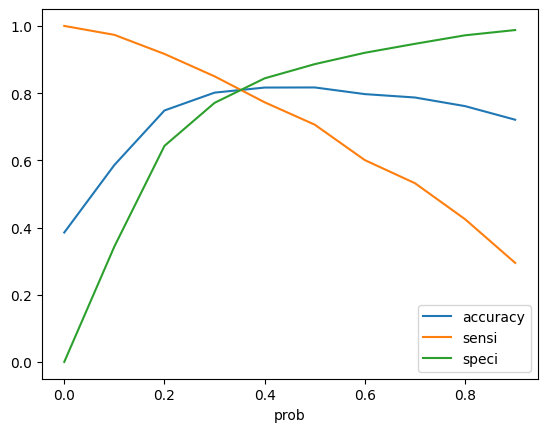

In [352]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [353]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Training data

In [354]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


### Model Evaluation

In [355]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


In [356]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]])

In [357]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [358]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8172526573998364


In [359]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8069142125480153


In [360]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19308578745198463


In [361]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7261169633127498


In [362]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8757643135075042


### Precision and Recall
1. Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
2. Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [363]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3461,  444],
       [ 719, 1727]])

In [364]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7954859511745739


In [365]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7060506950122649


In [366]:
from sklearn.metrics import precision_score, recall_score

In [367]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7954859511745739


In [368]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7060506950122649


#### Precision and recall tradeoff

In [369]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      1
 43      1
 44      1
 45      0
 46      1
 47      0
 48      1
 49      1
 50      0
 51      1
 52      1
 53      0
 54      0
 55      0
 56      0
 57      1
 58      1
 59      0
 60      0
 61      0
 62      0
 63      1
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      1
 78      1
 79      0
 80      0
 81      0
 82      0
 83      1
 84      0
 85      0
 86      1
 87      1
 88      1
 89      0
 90      0

In [370]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

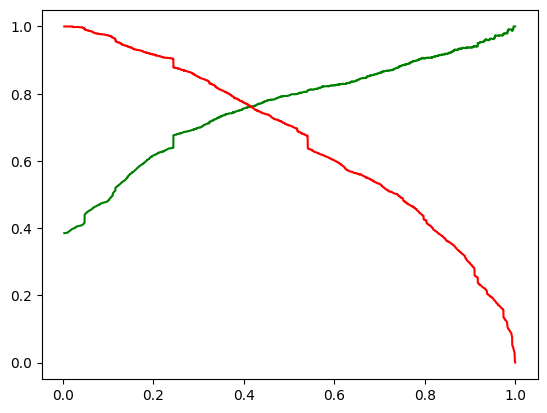

In [371]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .

#### Making predictions on the test set
#### Scaling the test data

In [372]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [373]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,1
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0


In [374]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.130342
1490    0.969057
7936    0.112570
4216    0.802999
3830    0.132924
1800    0.635544
6507    0.342648
4821    0.302742
4223    0.916621
4714    0.323477
dtype: float64

In [375]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [376]:
# Let's see the head
y_pred_1.head()

,0
3271,0.130342
1490,0.969057
7936,0.112570
4216,0.802999
3830,0.132924


In [377]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [378]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [379]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [380]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [381]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.130342
1,1,1490,0.969057
2,0,7936,0.112570
3,1,4216,0.802999
4,0,3830,0.132924


In [382]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [383]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [384]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.130342
1,1490,1,0.969057
2,7936,0,0.112570
3,4216,1,0.802999
4,3830,0,0.132924


In [385]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [386]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.130342,0
1,1490,1,0.969057,1
2,7936,0,0.112570,0
3,4216,1,0.802999,1
4,3830,0,0.132924,0


In [387]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8049944913698127


In [388]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  338],
       [ 193,  796]])

In [389]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [390]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


In [391]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8050749711649365


#### Assigning Lead Score to the Testing data

In [392]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.130342,0,13
1,1490,1,0.969057,1,97
2,7936,0,0.112570,0,11
3,4216,1,0.802999,1,80
4,3830,0,0.132924,0,13


### Observations:
After running the model on the Test Data , we obtain:

#### 1. Accuracy : 80.4 %
#### 2. Sensitivity : 80.4 %
#### 3. Specificity : 80.5 %

### Results

### 1) Comparing the values obtained for Train & Test:
#### Train Data:
#### Accuracy : 81.0 %
#### Sensitivity : 81.7 %
#### Specificity : 80.6 %

### Test Data:
#### Accuracy : 80.4 %
#### Sensitivity : 80.4 %
#### Specificity : 80.5 %

#### Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [393]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.969057,1,97
8,4223,1,0.916621,1,92
16,1946,1,0.924467,1,92
21,2461,1,0.992551,1,99
23,5822,1,0.997991,1,100
25,2684,1,0.997991,1,100
30,2010,1,0.982810,1,98
33,4062,1,0.992827,1,99
35,7696,1,0.930625,1,93
36,9049,1,0.878141,1,88


In [394]:
hot_leads.shape

(368, 5)

#### So there are 368 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [395]:
print("The Prospect ID of the customers which should be contacted are :\n")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :



array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174,
       4461, 1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490,
       1995, 4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505,
       8509, 6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675,
       6999, 5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,
        822, 8111, 2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489,
       2961, 1542, 5656, 2630, 6728, 8205, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

### 3) Finding out the Important Features from our final model:

In [396]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.811465
Lead Source_Reference                                   3.316598
What is your current occupation_Working Professional    2.608292
Last Activity_Other_Activity                            2.175096
Last Activity_SMS Sent                                  1.294180
Total Time Spent on Website                             1.095412
Lead Source_Olark Chat                                  1.081908
const                                                  -0.037565
Last Notable Activity_Modified                         -0.900449
Last Activity_Olark Chat Conversation                  -0.961276
Lead Origin_Landing Page Submission                    -1.193957
Specialization_Other                                   -1.202474
Do Not Email                                           -1.521825
dtype: float64

## Recommendations:

*   The company **should make calls** to the leads coming from the `lead sources "Welingak Websites"` and `"Reference"` as these are more likely to get converted.
*  The company **should make calls** to the leads who are the `"working professionals"` as they are more likely to get converted.
*   The company **should make calls** to the leads who spent `"more time on the websites"` as these are more likely to get converted.
*   The company **should make calls** to the leads coming from the `lead sources "Olark Chat"` as these are more likely to get converted.
*   The company **should make calls** to the leads whose `last activity` was `SMS Sent` as they are more likely to get converted.
*   The company **should not make calls** to the leads whose `last activity` was `"Olark Chat Conversation"` as they are not likely to get converted.
*  The company **should not make calls** to the leads whose `lead origin` is `"Landing Page Submission"` as they are not likely to get converted.
*   The company **should not make calls** to the leads whose `Specialization` was `"Others"` as they are not likely to get converted.
*   The company **should not make calls** to the leads who chose the option of `"Do not Email"` as `"yes"` as they are not likely to get converted.




